In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd

In [4]:
!pip install ivis

     |████████████████████████████████| 655kB 7.7MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391620 sha256=dc1607e13964dbd95e7d09e8253decaa542caab26c01a5528eb17c6192f37c2d
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [22]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc

import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_df = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input.csv")
test_df =pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input_test.csv")

mappings = {1: 0, 2: 1, 3:2}

train_df.label = [mappings[item] for item in train_df.label]
train_df

,Unnamed: 0,patient_id,sequence,label
0,0,Z8399761,"(unclear history), venous insufficiency, PVD, ...",2
1,1,Z11957588,period. It apparently cuts car accident rates ...,0
2,2,Z10809276,(P) 5 Hearing: no concerns Vision: needs updat...,1
3,3,Z8539944,"remission, s/p 1 suicide attempt, 3 IPLOC admi...",2
4,4,Z12696803,should be pursued at that point in time. He an...,0
5,5,Z7552077,since the hospital visit. The patient is accom...,1
6,6,Z11702635,71 y.o. female with has a past medical history...,2
7,7,Z15548862,in the Memory Diagnostic Clinic at McLean Hosp...,2
8,8,Z7648831,on back wound with significant output per RN. ...,2
9,9,Z7701777,lobes bilaterally and left parietal lobe. Thes...,2


In [7]:
X = train_df["sequence"]
y = train_df["label"]

In [8]:
y_label = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3, stratify = y_label)

In [32]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english",analyzer='word')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
#count_valid = count_vectorizer.transform(X_valid)

# Create the CountVectorizer DataFrame: count_train
count_train = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the CountVectorizer DataFrame: test_df
count_test = pd.DataFrame(count_test.A, columns=count_vectorizer.get_feature_names())

#count_valid = pd.DataFrame(count_valid.A, columns=count_vectorizer.get_feature_names())
count_train.head()

,10,11,15,16,18,2017,22,38611851,50,70,abscess,accompanied,administered,admissions,age,alexander,alzheimer,ambulatory,amyloid,angiopathy,anna,annual,anticoagulation,antiplatelets,anxiety,appendectomy,assessment,assistance,attempt,awareness,behavioral,benign,blake,block,branch,bso,bundle,bwh,cataract,cerebral,...,progressive,provider,pursued,pvd,recent,referral,referred,referring,regarding,related,relation,remission,renal,report,results,review,rituxan,seizure,significant,status,stenting,suicide,summary,systems,tah,thigh,time,tracheomalacia,transient,ulcerations,unclear,upset,venous,verbal,vertigo,visit,volume,weight,wife,years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",analyzer='word')
tfidf_train= tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train  = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test  = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())

tfidf_train

,10,11,15,16,18,2017,22,38611851,50,70,abscess,accompanied,administered,admissions,age,alexander,alzheimer,ambulatory,amyloid,angiopathy,anna,annual,anticoagulation,antiplatelets,anxiety,appendectomy,assessment,assistance,attempt,awareness,behavioral,benign,blake,block,branch,bso,bundle,bwh,cataract,cerebral,...,progressive,provider,pursued,pvd,recent,referral,referred,referring,regarding,related,relation,remission,renal,report,results,review,rituxan,seizure,significant,status,stenting,suicide,summary,systems,tah,thigh,time,tracheomalacia,transient,ulcerations,unclear,upset,venous,verbal,vertigo,visit,volume,weight,wife,years
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.263644,0.000000,0.000000,0.000000,0.000000,0.000000,0.263644,0.000000,0.000000,0.000000,0.263644,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.228188,0.000000,0.000000,0.000000,0.000000,0.263644,0.00000,0.000000,0.263644,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.263644,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.313426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313426,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.23107,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.23107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.23107,0.000000,0.000000,0.000000,0.23107,0.23107,0.000000,0.23107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.203012,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.156338,0.203012,0.00000,0.00000,0.406024,0.000000,0.00000,0.00000,0.000000,0.000000,0.203012,0.000000,0.000000,0.000000,0.203012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203012,0.000000,0.00000,...,0.000000,0.203012,0.000000,0.00000,0.000000,0.203012,0.000000,0.203012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.191994,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000

In [36]:
tfidf_train = tfidf_train.to_numpy()
tfidf_test = tfidf_test.to_numpy()

In [34]:
print(np.unique(y_test))

[0 1 2]


In [37]:
ivis = Ivis(embedding_dims=20, model='maaten',
           n_epochs_without_progress=5, 
            k =10, batch_size= 4 #deletee when get full gold standard dataset
            )
ivis.fit(tfidf_train, y_train.values)

100%|██████████| 14/14 [00:00<00:00, 138.95it/s]

Building KNN index
Extracting KNN neighbours


Training neural network
Epoch 1/1000
4/4 [==============================] - 2s 29ms/step - loss: 1.1654 - stacked_triplets_loss: 1.1381 - supervised_loss: 1.1927
Epoch 2/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.8160 - stacked_triplets_loss: 1.8237 - supervised_loss: 1.8082
Epoch 3/1000
4/4 [==============================] - 0s 29ms/step - loss: 2.0662 - stacked_triplets_loss: 1.8131 - supervised_loss: 2.3194
Epoch 4/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.2419 - stacked_triplets_loss: 1.5380 - supervised_loss: 2.9458
Epoch 5/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.2026 - stacked_triplets_loss: 1.6039 - supervised_loss: 0.8012
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.8128 - stacked_triplets_loss: 1.7384 - supervised_loss: 3.8873


Ivis(annoy_index_path=None, batch_size=4, build_index_on_disk=True,
     callbacks=None, distance='pn', embedding_dims=20, epochs=1000, k=10,
     knn_distance_metric='angular', model='maaten', n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7f03491f1b50>,
     ntrees=50, precompute=True, search_k=-1,
     supervision_metric='sparse_categorical_crossentropy',
     supervision_weight=0.5, verbose=1)

In [38]:
train_embeddings = ivis.transform(tfidf_train)
test_embeddings = ivis.transform(tfidf_test)

2/2 [==============================] - 0s 7ms/step


In [39]:
print(test_embeddings)

[[ 1.006758    0.04006311  0.7321521   0.7385148   0.36118913  1.1565695
   0.91188663  1.2180657   0.7046638   0.31769678 -0.12321071 -0.5448396
   0.11472595 -0.08091892  0.05315344  0.329474   -0.04460235  0.69586056
  -1.2470496  -0.6401661 ]
 [ 1.9700388  -0.52823186  1.6555337   1.0471056   0.96483344  2.6481447
   3.1275828   1.8783958   2.0626364   0.33865878 -0.5267469  -1.2503597
   1.5523475  -0.2349138   0.30810386 -0.22165987 -0.8532441   0.2397596
  -0.44398868 -1.7417661 ]
 [-1.220189   -0.6050553  -0.9484606   0.47749445  1.0029174   0.29932898
   0.7118355   0.28679895 -0.9451627  -1.0562174  -1.0760833  -0.742219
  -0.7130275  -0.06621145  0.5218095  -0.61268556 -0.18160935 -0.19475135
   0.23852947 -0.45956114]
 [ 1.4432167   1.037909   -0.30029714  1.5383642   0.47679687  1.691274
   3.532473    1.7977442   1.2231871   0.9752953  -0.5813644  -1.7724147
   0.97399575 -0.40099117 -1.1321043  -0.30407524 -1.0500436   1.6351349
  -0.1831411  -3.3049135 ]
 [-0.6950351   

Text(0.5, 1.0, 'Testing Set')

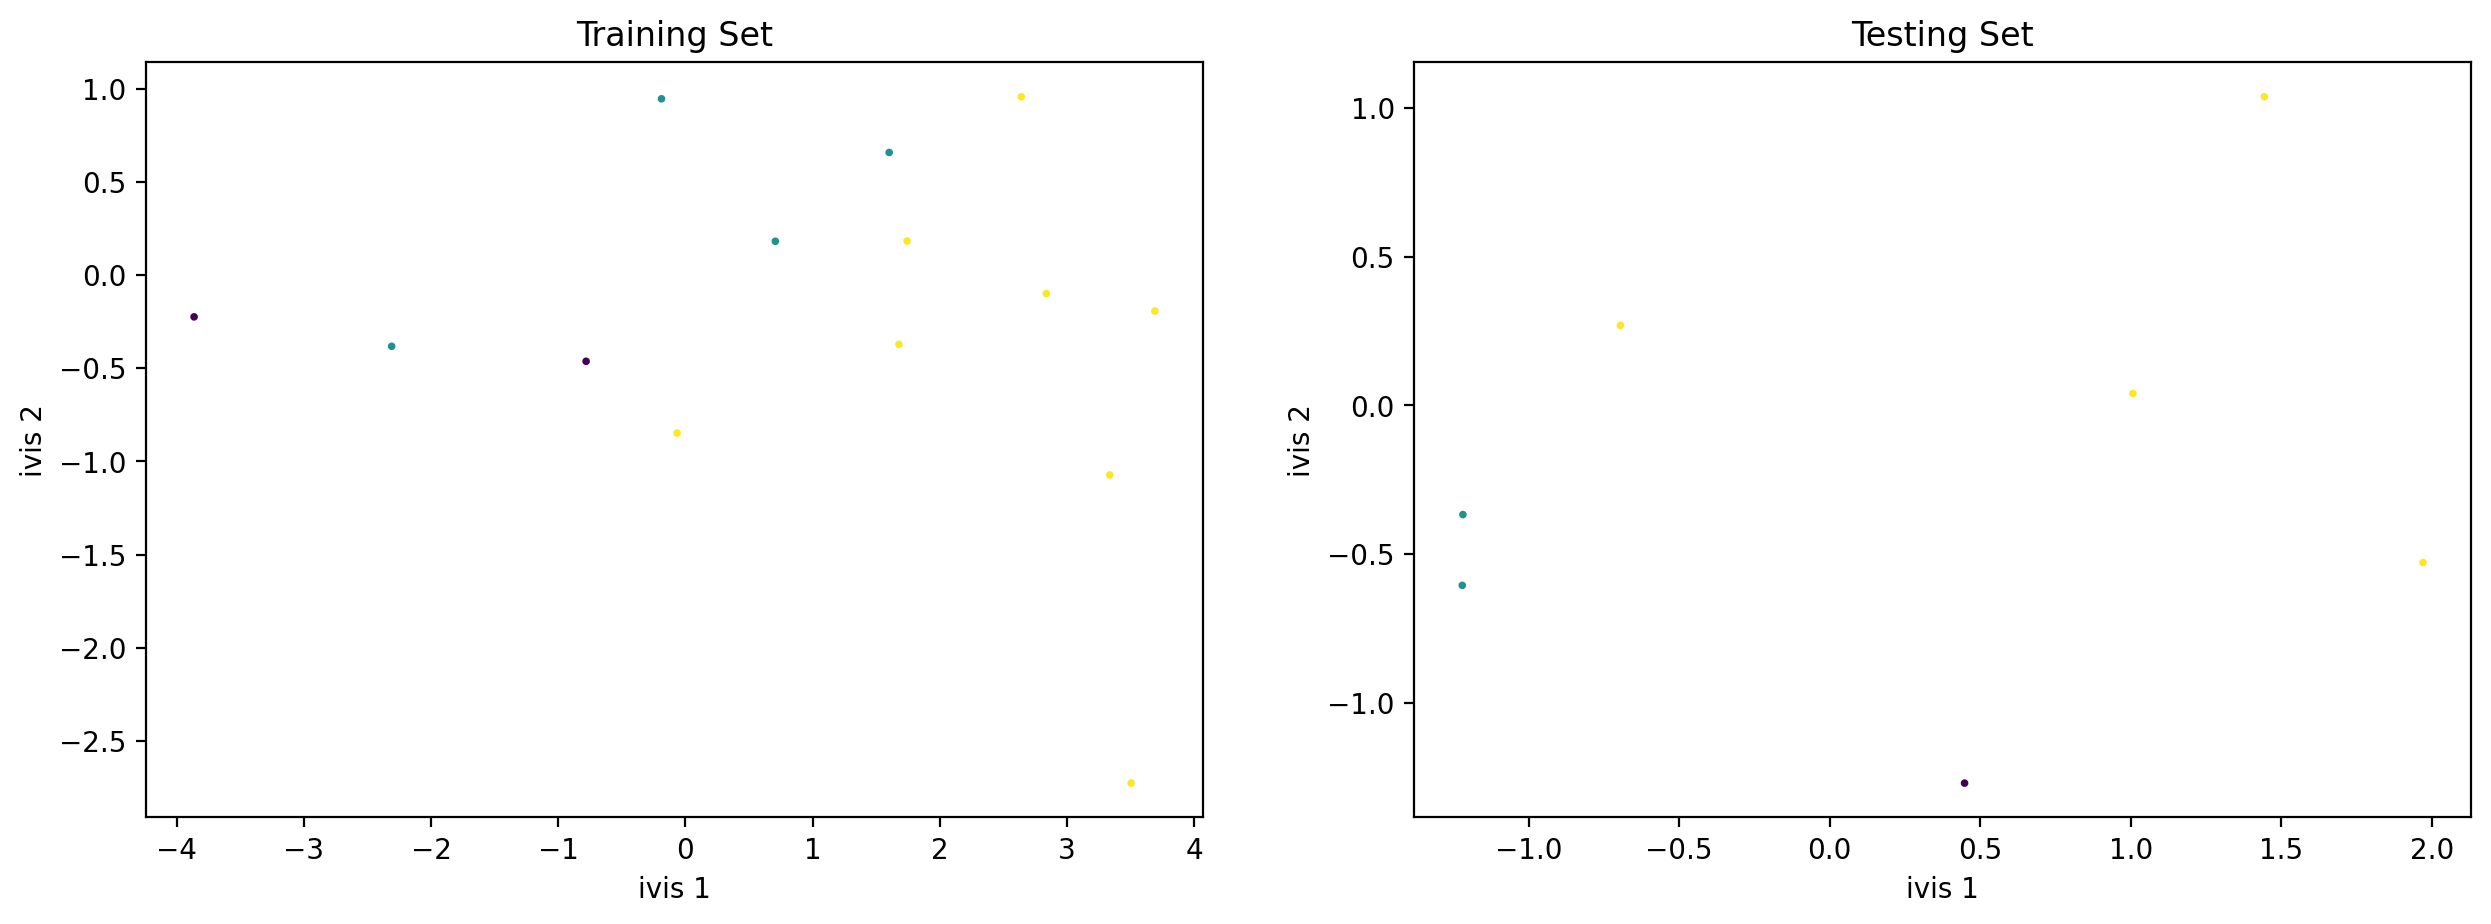

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=200)
ax[0].scatter(x=train_embeddings[:, 0], y=train_embeddings[:, 1], c=y_train, s=3)
ax[0].set_xlabel('ivis 1')
ax[0].set_ylabel('ivis 2')
ax[0].set_title('Training Set')

ax[1].scatter(x=test_embeddings[:, 0], y=test_embeddings[:, 1], c=y_test, s=3)
ax[1].set_xlabel('ivis 1')
ax[1].set_ylabel('ivis 2')
ax[1].set_title('Testing Set')

In [41]:
clf = LogisticRegression(solver="lbfgs").fit(train_embeddings, y_train)
labels = clf.predict(test_embeddings)
proba = clf.predict_proba(test_embeddings)

target_names = ['NO', 'NTR', 'YES']
results = classification_report(y_test, labels, target_names=target_names, output_dict=True)
results = pd.DataFrame(results).transpose()
print(results)

print('\nConfusion Matrix')
print(confusion_matrix(y_test, labels))
#print('Average Precision: '+str(average_precision_score(y_test, proba[:, 1])))
#print('ROC AUC: '+ str(roc_auc_score(y_test, labels, multi_class='ovr', average = 'macro')))

              precision    recall  f1-score   support
NO             0.000000  0.000000  0.000000  1.000000
NTR            1.000000  0.500000  0.666667  2.000000
YES            0.750000  0.750000  0.750000  4.000000
accuracy       0.571429  0.571429  0.571429  0.571429
macro avg      0.583333  0.416667  0.472222  7.000000
weighted avg   0.714286  0.571429  0.619048  7.000000

Confusion Matrix
[[0 0 1]
 [1 1 0]
 [1 0 3]]


In [42]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(train_embeddings, y_train)

labels_random_forest = clf_random_forest.predict(test_embeddings)

target_names = ['NO', 'NTR', 'YES']
results = classification_report(y_test, labels_random_forest, target_names=target_names, output_dict=True)
results = pd.DataFrame(results).transpose()
print(results)

print('\nConfusion Matrix')
print(confusion_matrix(y_test, labels_random_forest))

#print('ROC AUC: '+ str(roc_auc_score(y_test, labels_random_forest, multi_class = 'ovo')))

              precision    recall  f1-score   support
NO             0.000000  0.000000  0.000000  1.000000
NTR            0.400000  1.000000  0.571429  2.000000
YES            1.000000  0.500000  0.666667  4.000000
accuracy       0.571429  0.571429  0.571429  0.571429
macro avg      0.466667  0.500000  0.412698  7.000000
weighted avg   0.685714  0.571429  0.544218  7.000000

Confusion Matrix
[[0 1 0]
 [0 2 0]
 [0 2 2]]
